In [4]:
#Dependencies 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [5]:
# Load datasets
# census_data = pd.read_csv('..''Resources'') 
## ^^ this will become API right? -natalie 
median_prices_all = pd.read_csv("Resources/median_sales_price_all.csv")
median_prices_sfr = pd.read_csv("Resources/median_sales_price_sfr.csv")

# Display the first few rows of each dataset
median_prices_all.head()
median_prices_sfr.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,102001,0,United States,country,NaN,226983.0,226453.0,226900.0,227722.0,228611.0,...,340596.0,341490.0,341300.0,341096.0,338428.0,336115.0,335908.0,340182.0,346301.0,351705.0
1,394913,1,"New York, NY",msa,NY,398221.0,395131.0,394984.0,396389.0,396502.0,...,582875.0,594256.0,596951.0,600207.0,599063.0,602948.0,605790.0,607938.0,611763.0,617557.0
2,753899,2,"Los Angeles, CA",msa,CA,674017.0,670442.0,670479.0,668989.0,663778.0,...,887388.0,905324.0,914676.0,920513.0,922876.0,920292.0,917638.0,922305.0,932421.0,949769.0
3,394463,3,"Chicago, IL",msa,IL,230544.0,229369.0,229997.0,232445.0,231988.0,...,296368.0,301159.0,302767.0,302285.0,300267.0,299301.0,300763.0,302937.0,306699.0,310235.0
4,394514,4,"Dallas, TX",msa,TX,258652.0,254302.0,251613.0,251635.0,252011.0,...,388234.0,389270.0,387314.0,384480.0,383918.0,382263.0,383195.0,384607.0,389400.0,391458.0


In [6]:
# We only want to look at Nashville
med_prices_all = median_prices_all[median_prices_all["RegionName"] == "Nashville, TN"]
med_prices_sfr = median_prices_sfr[median_prices_sfr["RegionName"] == "Nashville, TN"]

In [7]:
# Get summary statistics
med_prices_all.info()
med_prices_sfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 36 to 36
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1 non-null      int64  
 1   SizeRank    1 non-null      int64  
 2   RegionName  1 non-null      object 
 3   RegionType  1 non-null      object 
 4   StateName   1 non-null      object 
 5   2018-08-31  1 non-null      float64
 6   2018-09-30  1 non-null      float64
 7   2018-10-31  1 non-null      float64
 8   2018-11-30  1 non-null      float64
 9   2018-12-31  1 non-null      float64
 10  2019-01-31  1 non-null      float64
 11  2019-02-28  1 non-null      float64
 12  2019-03-31  1 non-null      float64
 13  2019-04-30  1 non-null      float64
 14  2019-05-31  1 non-null      float64
 15  2019-06-30  1 non-null      float64
 16  2019-07-31  1 non-null      float64
 17  2019-08-31  1 non-null      float64
 18  2019-09-30  1 non-null      float64
 19  2019-10-31  1 non-null      float64


In [8]:
# Check for missing values
med_prices_all.isnull().sum()
med_prices_sfr.isnull().sum()
med_prices_all.dropna()
med_prices_sfr.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
36,394902,37,"Nashville, TN",msa,TN,259825.0,256433.0,257245.0,256790.0,258817.0,...,411306.0,414338.0,416883.0,418967.0,419458.0,416740.0,419725.0,422760.0,430412.0,434238.0


In [9]:
# shaping data to be able to add to it later
med_prices= med_prices_all.T
med_prices = med_prices.reset_index()

#dropping identifiers because we know we're only looking at nashville 
med_prices = med_prices.drop(med_prices.index[:5])

#renaming columns 
med_prices.rename(columns={36:'monthly_med_prices'}, inplace =True)
med_prices.rename(columns={'index':'dates'}, inplace =True)

med_prices.head()
# med_prices_t.columns

,dates,monthly_med_prices
5,2018-08-31,256243.0
6,2018-09-30,252518.0
7,2018-10-31,253058.0
8,2018-11-30,252506.0
9,2018-12-31,255555.0


In [10]:
#Doing the same to SFR 
prices_sfr = med_prices_sfr.T
prices_sfr = prices_sfr.reset_index()
prices_sfr = prices_sfr.drop(prices_sfr.index[:5])

prices_sfr.rename(columns={36:'sfr_monthly_med_prices'}, inplace =True)
prices_sfr.rename(columns={'index':'dates'}, inplace =True)

prices_sfr.head()

,dates,sfr_monthly_med_prices
5,2018-08-31,259825.0
6,2018-09-30,256433.0
7,2018-10-31,257245.0
8,2018-11-30,256790.0
9,2018-12-31,258817.0


In [11]:
# merging so we have nashville median prices for all and for single family rentalls in one place 
# this is only possible because zillow collects data at the same time for both 
med_prices = pd.merge(med_prices, prices_sfr, on='dates')
med_prices.head()

,dates,monthly_med_prices,sfr_monthly_med_prices
0,2018-08-31,256243.0,259825.0
1,2018-09-30,252518.0,256433.0
2,2018-10-31,253058.0,257245.0
3,2018-11-30,252506.0,256790.0
4,2018-12-31,255555.0,258817.0


In [12]:
# Load datasets
# read in mortgage data
mortage_rates_df = pd.read_csv("Resources/Mortgage.csv")


# Display the first few rows of each dataset
mortage_rates_df.head()


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [13]:
med_prices_all.info()
med_prices_sfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 36 to 36
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1 non-null      int64  
 1   SizeRank    1 non-null      int64  
 2   RegionName  1 non-null      object 
 3   RegionType  1 non-null      object 
 4   StateName   1 non-null      object 
 5   2018-08-31  1 non-null      float64
 6   2018-09-30  1 non-null      float64
 7   2018-10-31  1 non-null      float64
 8   2018-11-30  1 non-null      float64
 9   2018-12-31  1 non-null      float64
 10  2019-01-31  1 non-null      float64
 11  2019-02-28  1 non-null      float64
 12  2019-03-31  1 non-null      float64
 13  2019-04-30  1 non-null      float64
 14  2019-05-31  1 non-null      float64
 15  2019-06-30  1 non-null      float64
 16  2019-07-31  1 non-null      float64
 17  2019-08-31  1 non-null      float64
 18  2019-09-30  1 non-null      float64
 19  2019-10-31  1 non-null      float64


In [14]:
mortage_rates_df.isnull().sum()
mortage_rates_df.dropna()


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2739,2023-09-28,7.31
2740,2023-10-05,7.49
2741,2023-10-12,7.57
2742,2023-10-19,7.63


In [15]:
# shaping data to be able to add to it later
mort_rates = mortage_rates_df

#renaming columns 
mort_rates.rename(columns={'DATE':'dates'}, inplace =True)
mort_rates.rename(columns={'MORTGAGE30US':'30_yr_Mortgage_US'}, inplace =True)

mort_rates.head()
# med_prices_t.columns

,dates,30_yr_Mortgage_US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [20]:
# merging mortgage and sales price dataframes
mortgage_sales_df = pd.merge(med_prices, mort_rates, on='dates')
mortgage_sales_df



,dates,monthly_med_prices,sfr_monthly_med_prices,30_yr_Mortgage_US
0,2019-01-31,256396.0,259721.0,4.46
1,2019-02-28,257242.0,260735.0,4.35
2,2019-10-31,275644.0,277572.0,3.78
3,2020-04-30,285000.0,285914.0,3.23
4,2020-12-31,310135.0,317490.0,2.67
5,2021-09-30,364827.0,368110.0,3.01
6,2022-03-31,393648.0,397387.0,4.67
7,2022-06-30,425281.0,429337.0,5.70
8,2023-08-31,410332.0,414338.0,7.18


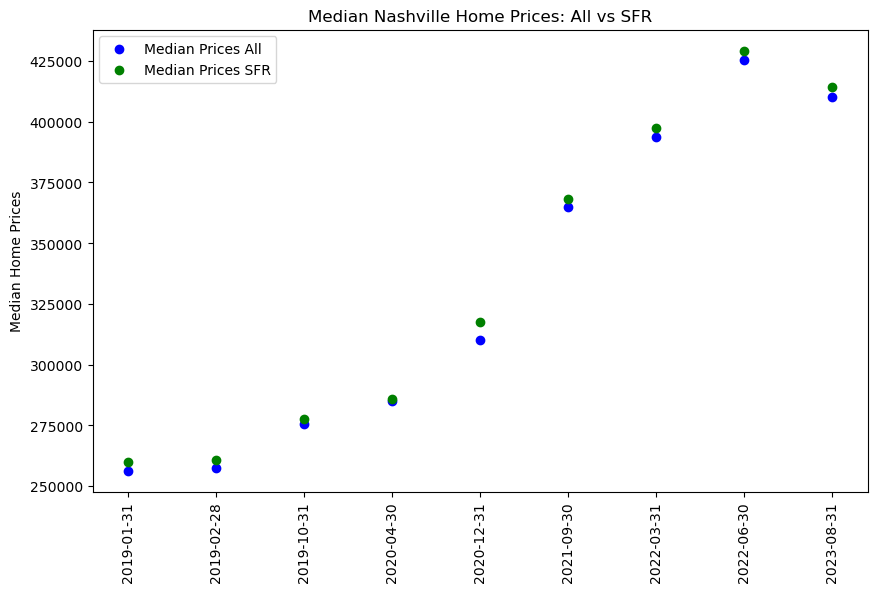

In [60]:
dates = mortgage_sales_df['dates']


plt.figure(figsize=(10,6))
plt.scatter(dates,mortgage_sales_df["monthly_med_prices"], color = 'blue', marker= 'o', label = "Median Prices All")
plt.scatter(dates,mortgage_sales_df["sfr_monthly_med_prices"], color = 'green', marker='o', label = "Median Prices SFR")
plt.title('Median Nashville Home Prices: All vs SFR')
plt.ylabel('Median Home Prices')
plt.xticks(rotation = 90)
plt.legend()
# plt.grid(True)

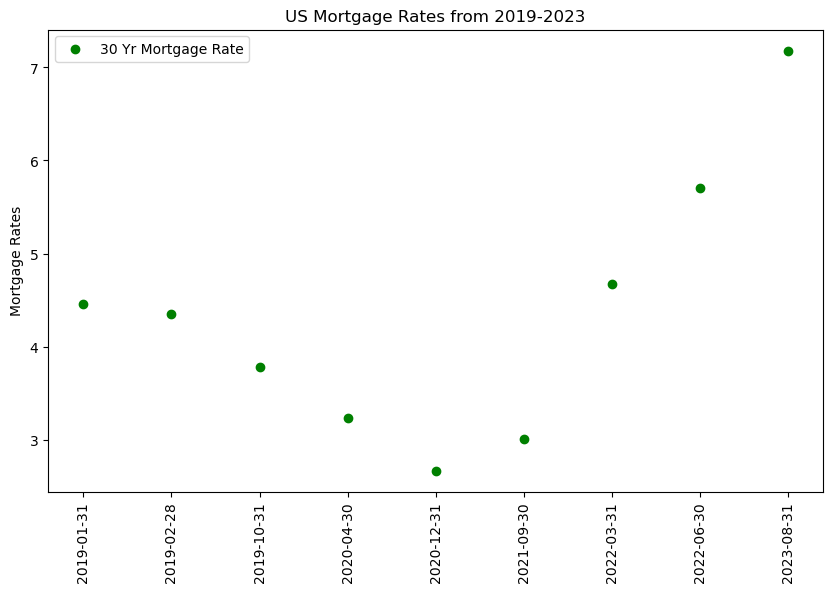

In [61]:
#scatter plot of US mortgage rates from 2019 - 2023
dates = mortgage_sales_df['dates']


plt.figure(figsize=(10,6))
#plt.scatter(mortgage_sales_df['monthly_med_prices'],dates, color = 'blue', marker= 'o', label = "Median Prices All")
plt.scatter(dates,mortgage_sales_df['30_yr_Mortgage_US'], color = 'green', marker='o', label = "30 Yr Mortgage Rate")
plt.title('US Mortgage Rates from 2019-2023')
plt.ylabel('Mortgage Rates')
plt.xticks(rotation = 90)
plt.legend()
# plt.grid(True)

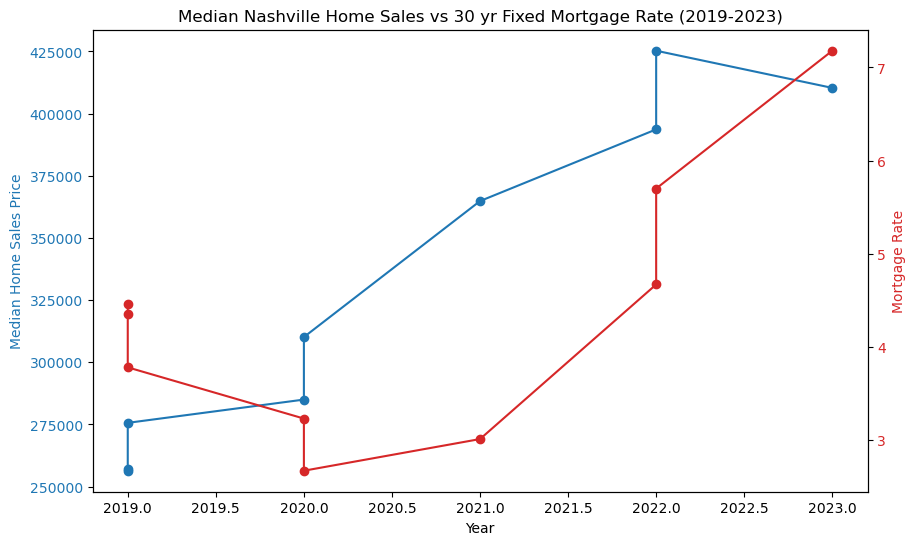

In [27]:
data1 = {
    'X1': [2019, 2019, 2019, 2020, 2020, 2021, 2022, 2022, 2023],
    'Y1': [256396.0,257242.0, 275644.0,285000.0,310135.0, 364827.0,393648.0,425281.0,410332.0]
}

# Sample data for the second dataset
data2 = {
    'X2': [2019, 2019, 2019 ,2020, 2020, 2021, 2022, 2022, 2023],
    'Y2': [4.46, 4.35, 3.78, 3.23,2.67, 3.01, 4.67, 5.70, 7.18]
}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Home Sales Price', color=color)
ax1.scatter(df1['X1'], df1['Y1'], color=color, label='Dataset 1')
ax1.plot(df1['X1'], df1['Y1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the second dataset
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mortgage Rate', color=color)
ax2.scatter(df2['X2'], df2['Y2'], color=color, label='Dataset 2')
ax2.plot(df2['X2'], df2['Y2'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Median Nashville Home Sales vs 30 yr Fixed Mortgage Rate (2019-2023)')

# Show plot
plt.show()